In [1]:
import os
import sys
import pandas as pd
%ls
sys.path.append("../preprocessing/npy")
import sampling as samp
import normalizzation as norm
sys.path.append("../models")
from lstm_model import LSTMModel

lstm.ipynb  rforest.ipynb  svm.ipynb  tests/  xgboost.ipynb


2025-03-18 22:32:49.824169: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-X.Y/lib64
2025-03-18 22:32:49.824188: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
partition = input("Inserisci la partizione che vuoi utilizzare")
print("Hai inserito la partizione: ", partition)
partition = os.path.join("../partitioning/npy", partition)

foldername = input("Inserisci il nome della cartella dove salvare i risultati")
print("Hai inserito la cartella: ", foldername)

Hai inserito la partizione:  pf_sq10_sl3_ws64_st25
Hai inserito la cartella:  aaaaaaa


In [3]:
import tensorflow as tf
print("GPU disponibile:", tf.config.list_physical_devices('GPU'))

GPU disponibile: []


2025-03-18 22:33:04.262473: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-03-18 22:33:04.262507: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (paolo-Katana-15-B13VFK): /proc/driver/nvidia/version does not exist


In [4]:
def load_partitions(root_path):
    file_names = ["X_train.csv", "X_test.csv", "X_val.csv", "y_train.csv", "y_test.csv", "y_val.csv"]
    datasets = [pd.read_csv(os.path.join(root_path, file)).values for file in file_names]
    return tuple(datasets)

# load data
X_train, X_test, X_val, y_train, y_test, y_val = load_partitions(partition)

# show partitions dimention
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")

X_train shape: (2141, 1280), y_train shape: (2141, 128)
X_test shape: (458, 1280), y_test shape: (458, 128)
X_val shape: (458, 1280), y_val shape: (458, 128)


In [5]:
window_lag = X_train.shape[1]
input_shape = (window_lag, 1)
input_shape

(1280, 1)

In [6]:
window_lag = X_train.shape[1]
input_shape = (window_lag, 1)
print("input_shape: ", input_shape)

input_shape:  (1280, 1)


In [7]:
# initialize model
lstm_model = LSTMModel(input_shape, foldername, output_units=y_train.shape[1])

# show model structure
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


2025-03-18 22:33:04.847873: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


 lstm (LSTM)                 (None, 1280, 50)          10400     
                                                                 
 dropout (Dropout)           (None, 1280, 50)          0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 128)               6528      
                                                                 
Total params: 37,128
Trainable params: 37,128
Non-trainable params: 0
_________________________________________________________________


In [8]:
# training model
lstm_model.train(X_train, y_train, epochs=5, batch_size=32, validation_data = (X_val, y_val))

Epoch 1/5
67/67 [==============================] - ETA: 0s - loss: 0.7292 - mae: 0.6401 - root_mean_squared_error: 0.8537
Epoch 1: val_loss improved from inf to 0.69626, saving model to aaaaaaa/best_model.keras
67/67 [==============================] - 33s 473ms/step - loss: 0.7292 - mae: 0.6401 - root_mean_squared_error: 0.8537 - val_loss: 0.6963 - val_mae: 0.6264 - val_root_mean_squared_error: 0.8353
Epoch 2/5
67/67 [==============================] - ETA: 0s - loss: 0.7175 - mae: 0.6358 - root_mean_squared_error: 0.8467
Epoch 2: val_loss improved from 0.69626 to 0.68930, saving model to aaaaaaa/best_model.keras
67/67 [==============================] - 31s 460ms/step - loss: 0.7175 - mae: 0.6358 - root_mean_squared_error: 0.8467 - val_loss: 0.6893 - val_mae: 0.6240 - val_root_mean_squared_error: 0.8311
Epoch 3/5
67/67 [==============================] - ETA: 0s - loss: 0.7109 - mae: 0.6331 - root_mean_squared_error: 0.8428
Epoch 3: val_loss improved from 0.68930 to 0.68540, saving model

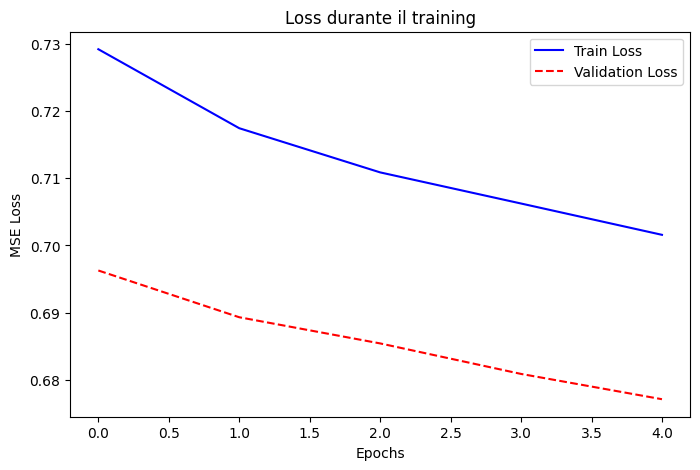

Grafico Loss salvato in aaaaaaa/loss_plot.png


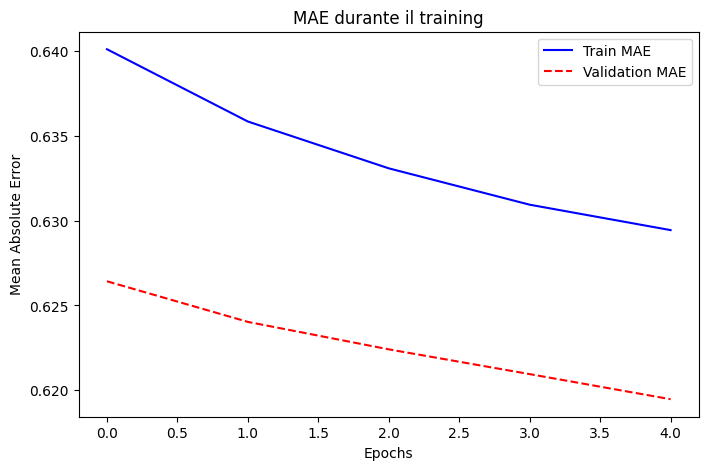

Grafico MAE salvato in aaaaaaa/mae_plot.png


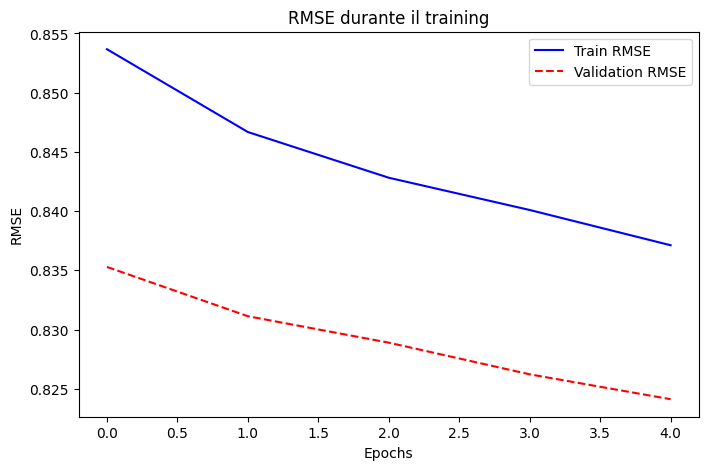

Grafico RMSE salvato in aaaaaaa/rmse_plot.png


In [9]:
lstm_model.plot_training_history()

In [10]:
lstm_model.evaluate(X_test, y_test)

Metriche salvate in aaaaaaa/evaluation_metrics.csv


{'MSE': 0.6785968903896031,
 'RMSE': 0.8237699256404079,
 'MAE': 0.6205497511899716,
 'R2': 0.02775125926784619}

In [11]:
y_pred = lstm_model.predict(X_test)  
comparison_df = lstm_model.compare_predictions(y_test, y_pred)  

Confronto predizioni salvato in aaaaaaa/predictions_comparison.csv


In [12]:
lstm_model.plot_predictions(y_test, y_pred)

File CSV con i valori reali e predetti salvato in: aaaaaaa/predictions_comparison.csv


In [13]:
lstm_model.save_model()

Modello salvato in aaaaaaa/lstm_model.keras


In [14]:
lstm_model.save_summary()

Sommario del modello salvato in aaaaaaa/model_summary.txt


In [15]:
lstm_model.save_training_history()

Training history salvata in aaaaaaa/training_history.npy
